In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv('StudentsPerformance.csv')

In [3]:
ds

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
ds.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# 1. Find out how many males and females participated in the test.

In [7]:
participants=ds.sort_values('gender')
participants['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

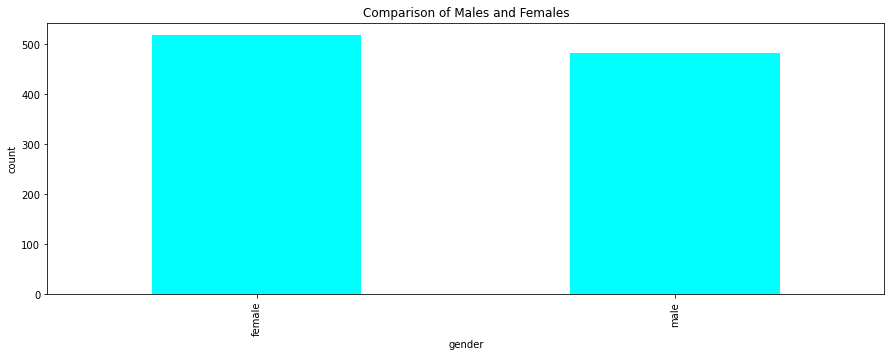

In [8]:
plt.subplots(figsize=(15,5))
ds['gender'].value_counts(normalize = True)
ds['gender'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

# 2. What do you think about the students' parental level of education?

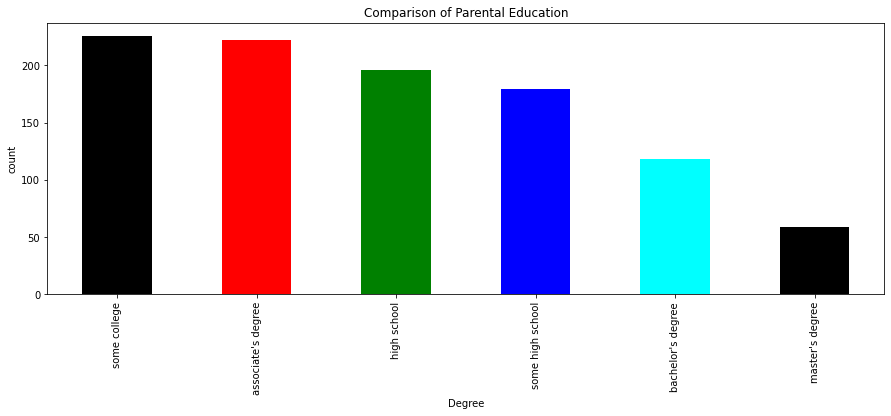

In [9]:
plt.subplots(figsize=(15,5))
ds['parental level of education'].value_counts(normalize = True)
ds['parental level of education'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

## Findings:


. There are 6 levels of Parental Education
. most of the parents have either have a college degree or associate's degree
. least of them have a masters degree


# 3. Who scores the most on average for math, reading and writing based on

# Gender

In [10]:
ds.groupby(['gender']).agg(['mean'])

,math score,reading score,writing score
,mean,mean,mean
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In case of females the highest average score for reading 
for males the highest average score is for maths

# Test preparation course

In [11]:
ds.groupby(['test preparation course']).agg(['mean'])

,math score,reading score,writing score
,mean,mean,mean
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


### Findings: Students who completed test preparation course scored highest score than other students

# 4. What do you think about the scoring variation for math, reading and writing based on Gender

In [12]:
ds.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

More scoring variations can be seen in females

# Test preparation course

In [13]:
ds[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg(['min','median','max'])

math score             writing score         \
                                      min median  max           min median   
test preparation course gender                                               
completed               female         23     67   99            36     79   
                        male           39     74  100            38     71   
none                    female          0     62  100            10     70   
                        male           27     67   97            15     60   

                                    reading score              
                                max           min median  max  
test preparation course gender                                 
completed               female  100            40     78  100  
                        male    100            37     72  100  
none                    female  100            17     71  100  
                        male     92            23     63   96

findings:
    Students who completed test preparation course scored highest score than other students

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [14]:
ds.nlargest(250,['math score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64


##### Submitted by, Kripa Rachel Thomas Norka_DSA_B3_2021